In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Downloads/Dataset_spine.csv")

In [3]:
df.head()

,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,Col10,Col11,Col12,Class_att,Unnamed: 13
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [6]:
df=df.rename(columns={
    "Col1" : "pelvic_incidence", 
    "Col2" : "pelvic_tilt",
    "Col3" : "lumbar_lordosis_angle",
    "Col4" : "sacral_slope", 
    "Col5" : "pelvic_radius",
    "Col6" : "degree_spondylolisthesis", 
    "Col7" : "pelvic_slope",
    "Col8" : "direct_tilt",
    "Col9" : "thoracic_slope", 
    "Col10" :"cervical_tilt", 
    "Col11" : "sacrum_angle",
    "Col12" : "scoliosis_slope", 
    "Class_att" : "class",
    "Unnamed: 13": "Temp"})

In [7]:
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class,Temp
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal,NaN
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal,NaN
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal,Prediction is done by using binary classificat...
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal,NaN
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal,NaN


In [8]:
df.shape

(310, 14)

In [11]:
df.describe(include="all")

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class,Temp
count,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310.000000,310,14
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,14
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Abnormal,Attribute9= thoracic_slope(numeric)
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,210,1
mean,60.496653,17.542822,51.930930,42.953831,117.920655,26.296694,0.472979,21.321526,13.064511,11.933317,-14.053139,25.645981,NaN,NaN
std,17.236520,10.008330,18.554064,13.423102,13.317377,37.559027,0.285787,8.639423,3.399713,2.893265,12.225582,10.450558,NaN,NaN
min,26.147921,-6.554948,14.000000,13.366931,70.082575,-11.058179,0.003220,7.027000,7.037800,7.030600,-35.287375,7.007900,NaN,NaN
25%,46.430294,10.667069,37.000000,33.347122,110.709196,1.603727,0.224367,13.054400,10.417800,9.541140,-24.289522,17.189075,NaN,NaN
50%,58.691038,16.357689,49.562398,42.404912,118.268178,11.767934,0.475989,21.907150,12.938450,11.953835,-14.622856,24.931950,NaN,NaN
75%,72.877696,22.120395,63.000000,52.695888,125.467674,41.287352,0.704846,28.954075,15.889525,14.371810,-3.497094,33.979600,NaN,NaN


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 14 columns):
pelvic_incidence            310 non-null float64
pelvic_tilt                 310 non-null float64
lumbar_lordosis_angle       310 non-null float64
sacral_slope                310 non-null float64
pelvic_radius               310 non-null float64
degree_spondylolisthesis    310 non-null float64
pelvic_slope                310 non-null float64
direct_tilt                 310 non-null float64
thoracic_slope              310 non-null float64
cervical_tilt               310 non-null float64
sacrum_angle                310 non-null float64
scoliosis_slope             310 non-null float64
class                       310 non-null object
Temp                        14 non-null object
dtypes: float64(12), object(2)
memory usage: 34.0+ KB


In [14]:
df.Temp.isna().sum()

296

In [17]:
df=df.drop(columns=["Temp"])

In [18]:
df.head()

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
0,63.027818,22.552586,39.609117,40.475232,98.672917,-0.254400,0.744503,12.5661,14.5386,15.30468,-28.658501,43.5123,Abnormal
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,0.415186,12.8874,17.5323,16.78486,-25.530607,16.1102,Abnormal
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,0.474889,26.8343,17.4861,16.65897,-29.031888,19.2221,Abnormal
3,69.297008,24.652878,44.311238,44.644130,101.868495,11.211523,0.369345,23.5603,12.7074,11.42447,-30.470246,18.8329,Abnormal
4,49.712859,9.652075,28.317406,40.060784,108.168725,7.918501,0.543360,35.4940,15.9546,8.87237,-16.378376,24.9171,Abnormal


In [21]:
df['class'].value_counts()

Abnormal    210
Normal      100
Name: class, dtype: int64

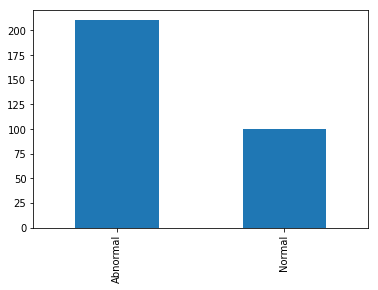

In [22]:
df['class'].value_counts().plot.bar()

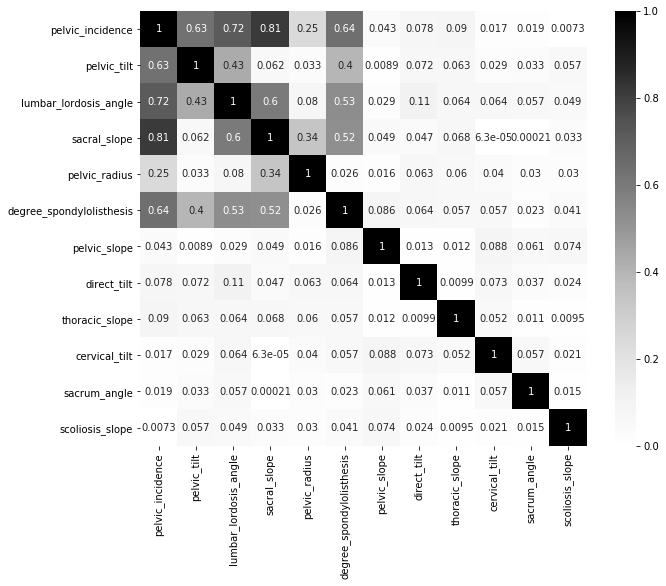

In [29]:
plt.figure(figsize=(10,8))
sns.heatmap(abs(df.corr()),cmap="Greys",annot=True)

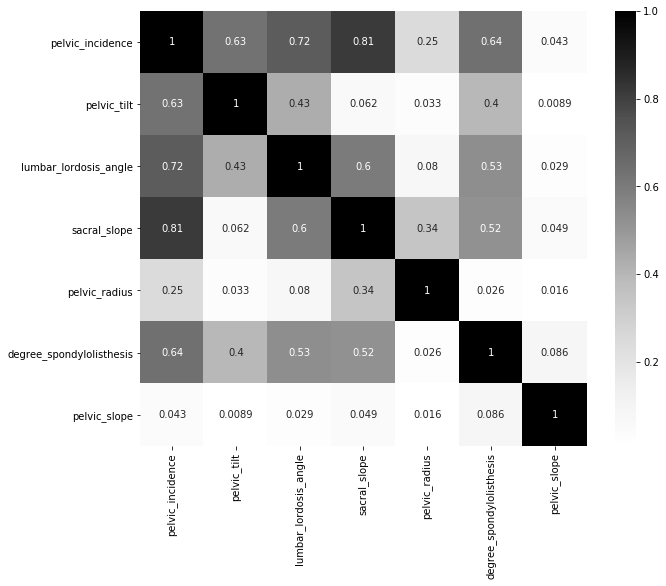

In [30]:
plt.figure(figsize=(10,8))
sns.heatmap(abs(df.iloc[:,:7].corr()),cmap="Greys",annot=True)

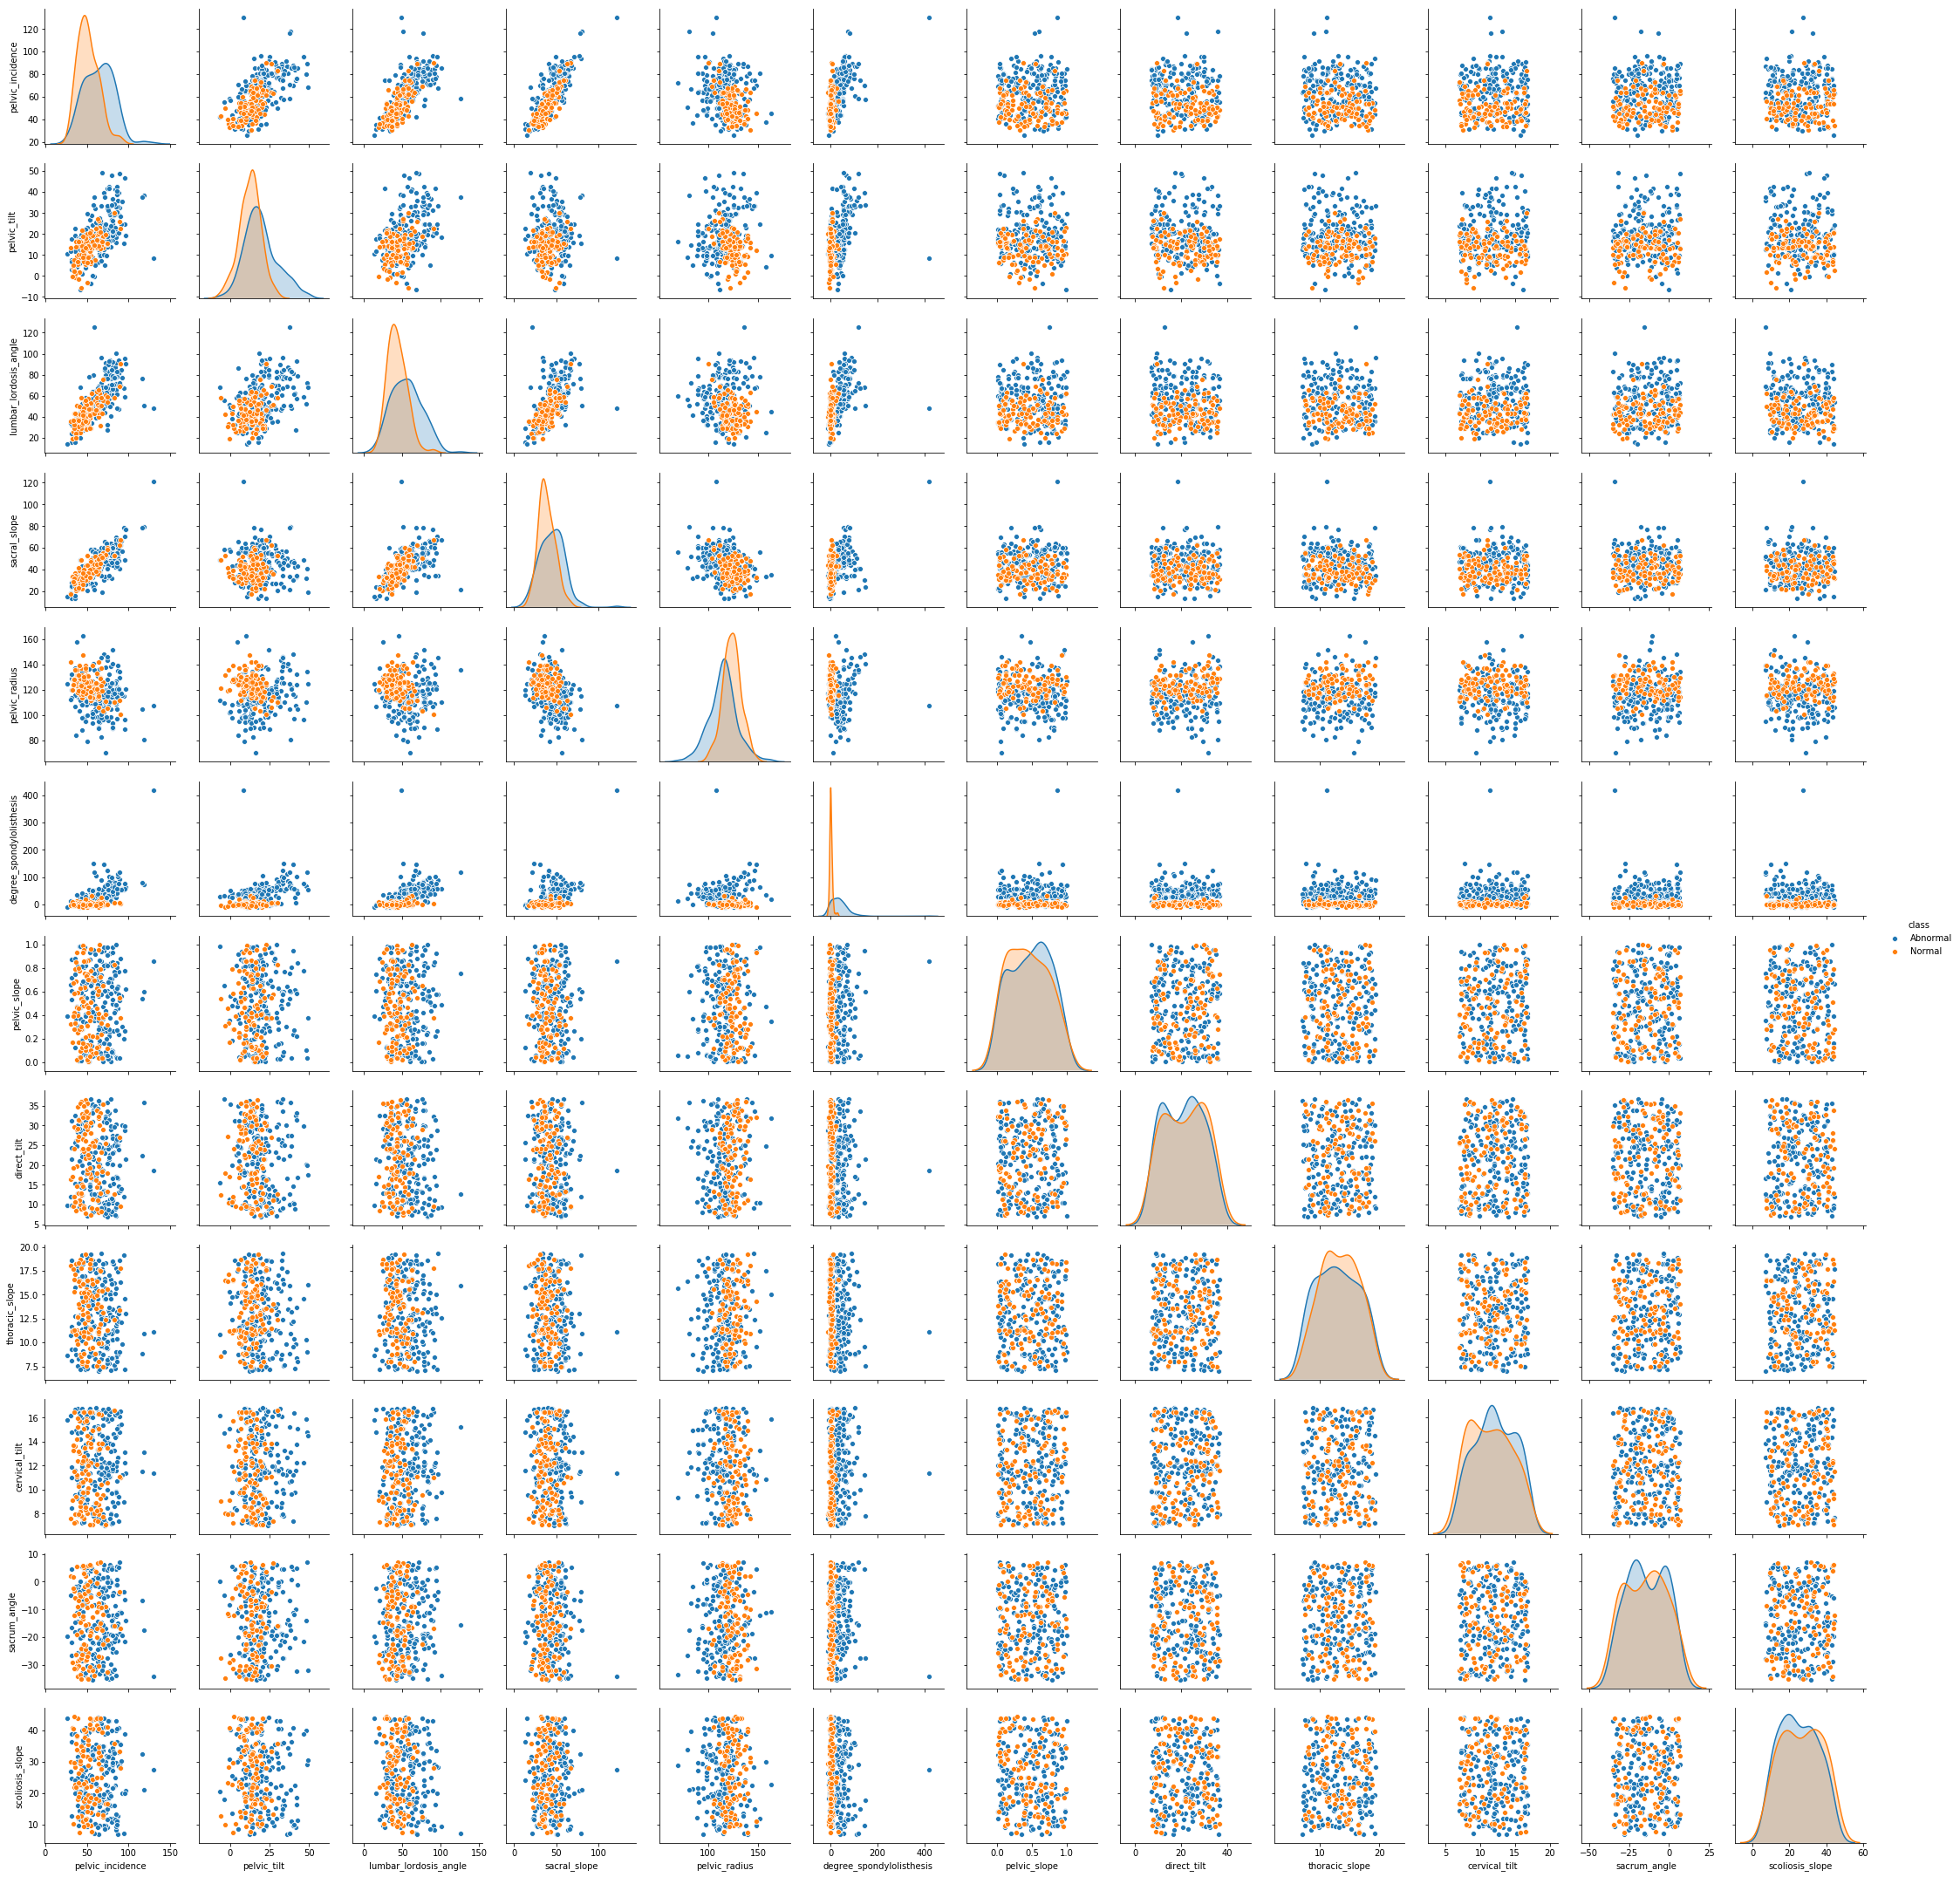

In [32]:
sns.pairplot(df, hue="class")

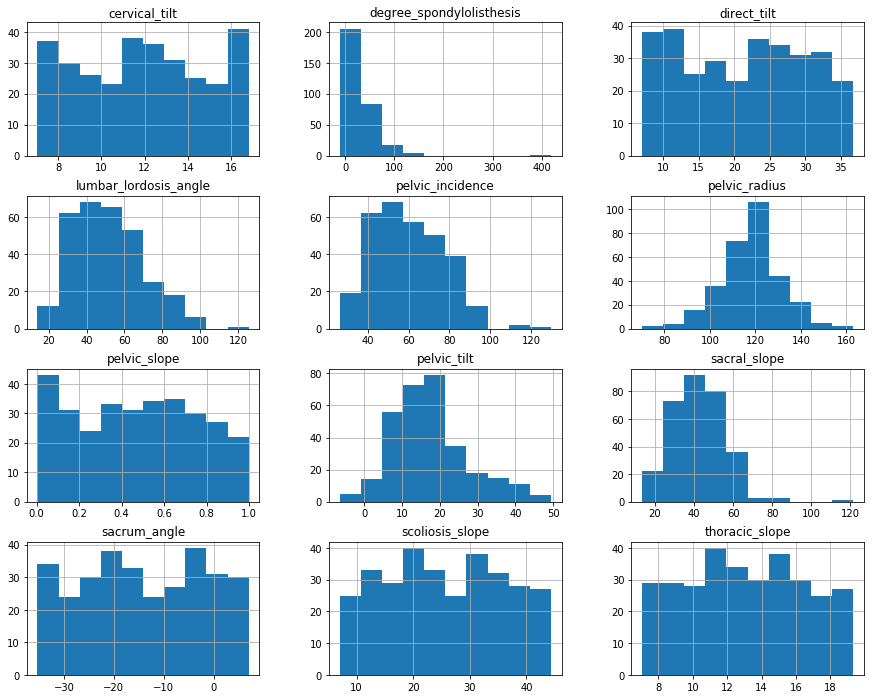

In [34]:
df.hist(figsize=(15,12))
plt.show()

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12]),
 <a list of 12 Text xticklabel objects>)

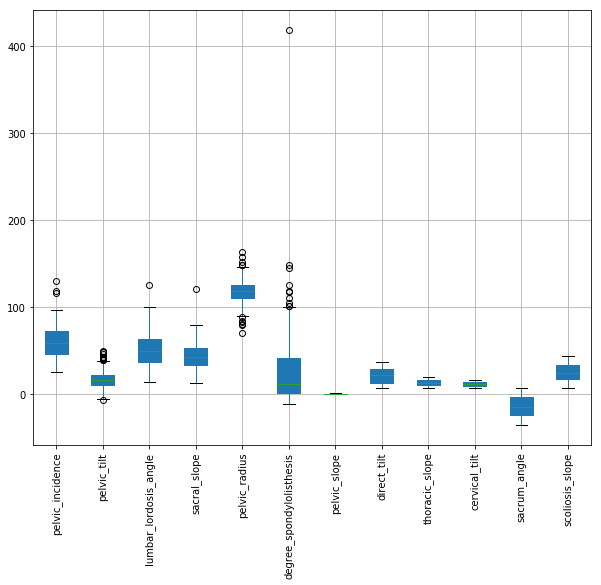

In [38]:
plt.figure(figsize=(10,8))
df.boxplot(patch_artist=True)
plt.xticks(rotation=90)

In [39]:
first_q=np.percentile(df.pelvic_radius,25)
third_q=np.percentile(df.pelvic_radius,75)

In [40]:
iqr=third_q-first_q

In [41]:
idl_max=1.5*iqr+third_q
idl_min=first_q-1.5*iqr

In [42]:
print(idl_max,idl_min)

147.60539161250003 88.57147911249999


In [45]:
df.loc[(df.pelvic_radius>idl_max) | (df.pelvic_radius<idl_min)]

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,degree_spondylolisthesis,pelvic_slope,direct_tilt,thoracic_slope,cervical_tilt,sacrum_angle,scoliosis_slope,class
9,36.686353,5.010884,41.948751,31.675469,84.241415,0.664437,0.367700,26.2011,8.7380,14.91416,-1.702097,21.4320,Abnormal
75,70.221452,39.822724,68.118403,30.398728,148.525562,145.378143,0.946611,10.3840,9.5742,11.22353,4.641629,9.8472,Abnormal
83,81.104100,24.794168,77.887020,56.309932,151.839857,65.214616,0.972006,10.5715,11.2339,13.29506,-12.139219,11.8487,Abnormal
85,45.443750,9.906072,45.000000,35.537678,163.071041,20.315315,0.345235,31.8795,15.0011,15.89311,-10.750511,22.7075,Abnormal
155,66.804796,14.551602,72.084912,52.253195,82.456038,41.685474,0.738029,24.6372,12.5023,11.90802,-7.585607,39.7443,Abnormal
162,118.144655,38.449501,50.838520,79.695154,81.024541,74.043767,0.599393,35.8563,10.9266,13.11354,-17.520810,21.2408,Abnormal
167,72.343594,16.420790,59.869012,55.922805,70.082575,12.072644,0.056944,31.8230,15.7134,9.36778,-33.489059,28.9479,Abnormal
173,50.825029,9.064729,56.300000,41.760300,78.999454,23.041524,0.051930,29.3962,16.3725,11.35215,-26.496342,33.9151,Abnormal
180,37.903910,4.479099,24.710274,33.424811,157.848799,33.607027,0.473130,24.8271,17.5433,10.87176,-11.190833,29.9090,Abnormal
190,43.718262,9.811985,52.000000,33.906277,88.434242,40.880923,0.811098,10.6583,16.9317,9.51271,-8.828259,12.1023,Abnormal


make a function to show the outlier for the column name
